In [1]:
import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
data = pd.read_csv('Emails.csv')
data.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


In [9]:
X = data.ExtractedBodyText.dropna().values

In [12]:
for x in X[:10]:
    print x, '\n'

B6
Thursday, March 3, 2011 9:45 PM
H: Latest How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx
March 3, 2011
For: Hillary 

Thx 

H <hrod17@clintonemail.com>
Friday, March 11, 2011 1:36 PM
Huma Abedin
Fw: H: Latest: How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx
Pis print. 

Pis print.
-•-...-^
H < hrod17@clintonernailcom>
Wednesday, September 12, 2012 2:11 PM
°Russorv@state.gov'
Fw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots
From [meat)
Sent: Wednesday, September 12, 2012 01:00 PM
To: 11
Subject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots
htte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-
deadly-riots/
Sent from my Verizon Wireless 4G LTE DROID
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739559
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HO

In [18]:
starting_words = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                  'October', 'November', 'December',
                  'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
                  'UNCLASSIFIED', 'STATE DEPT', 'SUBJECT TO', 'RELEASE',
                  'H ', 'Case', 'From', 'To', 'Sent', 'Date', 'Doc', 'U.S. Department', '\x0c',  'Cc', 'Re', 'cc']

def not_extra_line(line):
    for w in starting_words:
        if line.startswith(w):
            return False
    return True

In [19]:
X_new = map(lambda x: '\n'.join(filter(not_extra_line, x.split('\n'))), X)
for x in X_new[:10]:
    print x, '\n'

B6
H: Latest How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx
For: Hillary 

Thx 

Huma Abedin
Fw: H: Latest: How Syria is aiding Qaddafi and more... Sid
hrc memo syria aiding libya 030311.docx
Pis print. 

Pis print.
-•-...-^
°Russorv@state.gov'
Fw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots
Subject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots
htte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-
deadly-riots/ 

Huma Abedin
Fw: H: Latest: How Syria is aiding Qaddafi and more... Sid
hrc memo Syria aiding libya 030311.docx
Pis print. 

FYI 

B6
Fwd: more on libya
Libya 37 sept 12 12.docx
Sending direct. Just in. 

Fyi
B6
— — 

B6
Fwd: more on libya
Libya 37 sept 12 12.docx
Sending direct. Just in. 

Fyi 



In [103]:
def delete_trash(phrase, trash = {'Subject:', 'Subject'}):
    for tr in trash:
        phrase = phrase.replace(tr, '')
    
    return phrase

In [110]:
def not_space(phrase):
    return phrase != ' ' and phrase != ''

In [118]:
texts = map(lambda s: filter(does_not_contain_trash, s), data.RawText)
texts = map(lambda s: filter(not_space, s), texts)

In [119]:
texts = map(lambda s: map(lambda t: delete_trash(t), s), texts)

In [120]:
texts = map(lambda s: ' '.join(s), texts)

In [171]:
vectorizer = CountVectorizer(ngram_range=(2,2))
corpus = vectorizer.fit_transform(texts)

In [183]:
sum_biwords = np.array(corpus.sum(axis=0))[0]

In [184]:
sum_biwords.argmax()

330955

In [185]:
#voc_list = list(vectorizer.vocabulary_.iteritems())
filter(lambda s: vectorizer.vocabulary_[s] == 330955, vectorizer.vocabulary_.keys())

[u'of the']

In [186]:
from sklearn.cluster import KMeans

In [189]:
X = TfidfVectorizer(max_features=1000).fit_transform(texts)

In [192]:
%time y = KMeans(n_clusters=5).fit_predict(X)

CPU times: user 1min 9s, sys: 0 ns, total: 1min 9s
Wall time: 1min 9s


In [194]:
from sklearn.decomposition import PCA

In [199]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X.todense())

In [203]:
import matplotlib as plt
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<IPython.core.display.Javascript object>


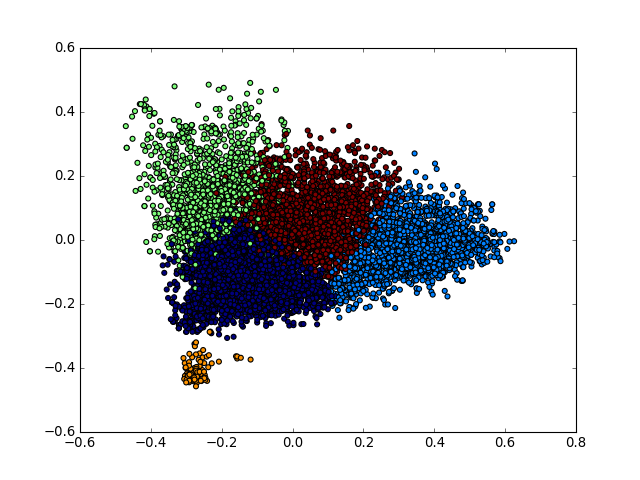

In [204]:
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y)
plt.show()